In [15]:
import numpy as np
import pandas as pd
import PIL
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import os
from tensorflow import keras
import numpy as np
from tensorflow.keras.preprocessing.image import load_img
import random
from keras.models import load_model 
from skimage.transform import rescale, resize, downscale_local_mean


# Part 1
# Training the Model
### Part 1 is for training purpose and preprocessing 
### This notebook could be run from Part 2, where we loaded the saved and trained model

# Created a new mask where each pixels contain information about only vegetation/non-vegetation

In [16]:
#Creating binary masks and saving it in a floder under name "filtered_target"

import os
c=0
for dn in os.listdir('train/train/masks/'):
    print(c)

    if dn[-4:]==".png": 
        #store
        imm = PIL.Image.open("train/train/masks/" + dn[:-4] + ".png")
        imm = imm.convert('RGB')
        imm = np.array(imm)
#         print(imm)
        for i in range(imm.shape[0]):
            for j in range(imm.shape[1]):
                if (imm[i, j] == np.array([255, 201, 0])).all()==True:
                    imm[i, j] =  0
                else:
                    imm[i, j] = 127
        print("loop_completed")
        tem = PIL.Image.fromarray(imm)
        x=PIL.ImageOps.grayscale(tem)
        (x.save('train/train/filtered_target/' + dn[:-4]+ ".png"))
        
    c+=1
        


0
127
loop_completed
254
381
loop_completed
508
635
loop_completed
762
889
loop_completed
1016
1143


KeyboardInterrupt: 

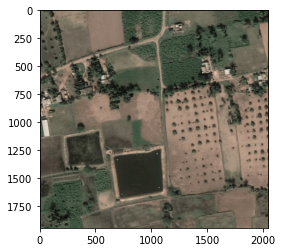

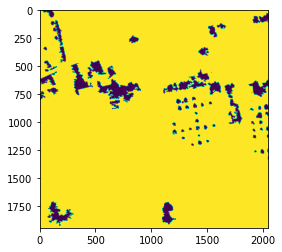

In [19]:
im = PIL.Image.open("train/train/satellite/TN_628563_13.47954739_80.12746019_18.png")
im = im.convert('RGB')
im = np.array(im)
plt.imshow(im)
plt.show()

imm = PIL.Image.open("train/train/filtered_target/TN_628563_13.47954739_80.12746019_18.png")
imm = np.array(imm)
plt.imshow(imm)
plt.show()


# Satellite Images and Masks are splitted into 16 parts and then  stored in differnet folders

In [6]:
input_img_paths = ["train/train/satellite/"+i for i in os.listdir("train/train/satellite/")]
target_img_paths = ["train/train/filtered_target/"+i for i in os.listdir("train/train/filtered_target/")]



In [14]:
test_img_paths[0][15:]

'TN_632258_12.05348273_79.18293543_18.png'

In [5]:
# im = plt.imread(test_img_paths[4])
# plt.imshow(im[0:487, 0:512]); plt.show()
# plt.imshow(im[0:487, 512:]); plt.show()
# plt.imshow(im[487:, 0:512]); plt.show()
# plt.imshow(im[487:, 512:]); plt.show()

In [6]:

for i in input_img_paths:
    im = PIL.Image.open(i)
    im = im.convert('RGB')
    im = np.array(im)
    
    im1 = PIL.Image.fromarray(im[0:974, 0:1024])
    im2 = PIL.Image.fromarray(im[0:974, 1024:])
    im3 = PIL.Image.fromarray(im[974:, 0:1024])
    im4 = PIL.Image.fromarray(im[974:, 1024:])
    
    im1.save("train/train/satellite_split/"+i[22:-4] + "_s1" + ".png")
    im2.save("train/train/satellite_split/"+i[22:-4] + "_s2" + ".png")
    im3.save("train/train/satellite_split/"+i[22:-4] + "_s3" + ".png")
    im4.save("train/train/satellite_split/"+i[22:-4] + "_s4" + ".png")
#     print(i)


for i in target_img_paths:
    im = PIL.Image.open(i)
    im = np.array(im)
    
    im1 = PIL.Image.fromarray(im[0:974, 0:1024])
    im2 = PIL.Image.fromarray(im[0:974, 1024:])
    im3 = PIL.Image.fromarray(im[974:, 0:1024])
    im4 = PIL.Image.fromarray(im[974:, 1024:])
    
    im1.save("train/train/filtered_target_split/"+i[28:-4] + "_s1" + ".png")
    im2.save("train/train/filtered_target_split/"+i[28:-4] + "_s2" + ".png")
    im3.save("train/train/filtered_target_split/"+i[28:-4] + "_s3" + ".png")
    im4.save("train/train/filtered_target_split/"+i[28:-4] + "_s4" + ".png")
#     print(i)


for i in test_img_paths:
    im = PIL.Image.open(i)
    im = im.convert('RGB')
    im = np.array(im)
    
    im1 = PIL.Image.fromarray(im[0:974, 0:1024])
    im2 = PIL.Image.fromarray(im[0:974, 1024:])
    im3 = PIL.Image.fromarray(im[974:, 0:1024])
    im4 = PIL.Image.fromarray(im[974:, 1024:])
    
    im1.save("test/satellite_split/"+i[15:-4] + "_s1" + ".png")
    im2.save("test/satellite_split/"+i[15:-4] + "_s2" + ".png")
    im3.save("test/satellite_split/"+i[15:-4] + "_s3" + ".png")
    im4.save("test/satellite_split/"+i[15:-4] + "_s4" + ".png")
#     print(i)
   
   

    
    
input_img_paths = ["train/train/satellite_split/"+i for i in os.listdir("train/train/satellite_split/")]
target_img_paths = ["train/train/filtered_target_split/"+i for i in os.listdir("train/train/filtered_target_split/")]

test_img_paths = ["test/satellite_split/"+i for i in os.listdir("test/satellite_split/")]





for i in input_img_paths:
    im = PIL.Image.open(i)
    im = im.convert('RGB')
    im = np.array(im)
    
    im1 = PIL.Image.fromarray(im[0:487, 0:512])
    im2 = PIL.Image.fromarray(im[0:487, 512:])
    im3 = PIL.Image.fromarray(im[487:, 0:512])
    im4 = PIL.Image.fromarray(im[487:, 512:])
    
    im1.save("train/train/satellite_split16/"+i[28:-4] + "_a" + ".png")
    im2.save("train/train/satellite_split16/"+i[28:-4] + "_b" + ".png")
    im3.save("train/train/satellite_split16/"+i[28:-4] + "_c" + ".png")
    im4.save("train/train/satellite_split16/"+i[28:-4] + "_d" + ".png")
#     print(i)


for i in target_img_paths:
    im = PIL.Image.open(i)
    im = np.array(im)
    
    im1 = PIL.Image.fromarray(im[0:487, 0:512])
    im2 = PIL.Image.fromarray(im[0:487, 512:])
    im3 = PIL.Image.fromarray(im[487:, 0:512])
    im4 = PIL.Image.fromarray(im[487:, 512:])
    
    im1.save("train/train/filtered_target_split16/"+i[34:-4] + "_a" + ".png")
    im2.save("train/train/filtered_target_split16/"+i[34:-4] + "_b" + ".png")
    im3.save("train/train/filtered_target_split16/"+i[34:-4] + "_c" + ".png")
    im4.save("train/train/filtered_target_split16/"+i[34:-4] + "_d" + ".png")
#     print(i)


for i in test_img_paths:
    im = PIL.Image.open(i)
    im = im.convert('RGB')
    im = np.array(im)
    
    im1 = PIL.Image.fromarray(im[0:487, 0:512])
    im2 = PIL.Image.fromarray(im[0:487, 512:])
    im3 = PIL.Image.fromarray(im[487:, 0:512])
    im4 = PIL.Image.fromarray(im[487:, 512:])
    
    im1.save("test/satellite_split16/"+i[21:-4] + "_a" + ".png")
    im2.save("test/satellite_split16/"+i[21:-4] + "_b" + ".png")
    im3.save("test/satellite_split16/"+i[21:-4] + "_c" + ".png")
    im4.save("test/satellite_split16/"+i[21:-4] + "_d" + ".png")
#     print(i)
   

In [3]:
input_img_paths = ["train/train/satellite_split16/"+i for i in os.listdir("train/train/satellite_split16/")]
target_img_paths = ["train/train/filtered_target_split16/"+i for i in os.listdir("train/train/filtered_target_split16/")]



In [9]:
img_size = (160, 160)
num_classes = 2   # vegetaion or non-vegetation
batch_size = 32

In [10]:
np.unique(imm)

array([  0, 127], dtype=uint8)

In [16]:

class Data_generator(keras.utils.Sequence):
    """Helper to iterate over the data (as Numpy arrays)."""

    def __init__(self, batch_size, img_size, input_img_paths, target_img_paths):
        self.batch_size = batch_size
        self.img_size = img_size
        self.input_img_paths = input_img_paths
        self.target_img_paths = target_img_paths

    def __len__(self):
        return len(self.target_img_paths) // self.batch_size

    def __getitem__(self, idx):
        """Returns tuple (input, target) correspond to batch #idx."""
        i = idx * self.batch_size
        batch_input_img_paths = self.input_img_paths[i : i + self.batch_size]
        batch_target_img_paths = self.target_img_paths[i : i + self.batch_size]
        x = np.zeros((self.batch_size,) + self.img_size + (3,), dtype="float32")
        for j, path in enumerate(batch_input_img_paths):
            img = load_img(path, target_size=self.img_size)
            x[j] = img
        y = np.zeros((self.batch_size,) + self.img_size + (1,), dtype="uint8")
        for j, path in enumerate(batch_target_img_paths):
            img = load_img(path, target_size=self.img_size, color_mode="grayscale")
            img = img
            y[j] = np.expand_dims(img, 2)
            # Making labels 0 and 1
            y[j] = y[j]/127
        return x, y


# Defining model

In [17]:


from tensorflow.keras import layers


def get_model(img_size, num_classes):
    inputs = keras.Input(shape=img_size + (3,))


    x = layers.Conv2D(32, 3, strides=2, padding="same")(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    for filters in [64, 128, 256]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        residual = layers.Conv2D(filters, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Adding 
        previous_block_activation = x  


        #Upsampling
    for filters in [256, 128, 64, 32]:
        x = layers.Activation("relu")(x)
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.UpSampling2D(2)(x)

        residual = layers.UpSampling2D(2)(previous_block_activation)
        residual = layers.Conv2D(filters, 1, padding="same")(residual)
        x = layers.add([x, residual])  
        previous_block_activation = x  

    # per-pixel classification 
    outputs = layers.Conv2D(num_classes, 3, activation="softmax", padding="same")(x)

    # Define the model
    model = keras.Model(inputs, outputs)
    return model


keras.backend.clear_session()

# Build model
model = get_model(img_size, num_classes)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 80, 80, 32)   896         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 80, 80, 32)   128         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 80, 80, 32)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

# Splitting the train and validation files

In [37]:

# Split our img paths into a training and a validation set
valN = 640
random.Random(123).shuffle(input_img_paths)
random.Random(123).shuffle(target_img_paths)
train_input_img_paths = input_img_paths[:-valN]
train_target_img_paths = target_img_paths[:-valN]
val_input_img_paths = input_img_paths[-valN:]
val_target_img_paths = target_img_paths[-valN:]

# Instantiate data Sequences for each split
train_gen = Data_generator(
    batch_size, img_size, train_input_img_paths, train_target_img_paths
)
val_gen = Data_generator(batch_size, img_size, val_input_img_paths, val_target_img_paths)

In [38]:
(val_gen)[0][1]

array([[[[1],
         [1],
         [1],
         ...,
         [1],
         [1],
         [1]],

        [[1],
         [1],
         [1],
         ...,
         [1],
         [1],
         [1]],

        [[1],
         [1],
         [1],
         ...,
         [1],
         [1],
         [1]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [1],
         [1],
         [1]],

        [[0],
         [0],
         [0],
         ...,
         [1],
         [1],
         [1]],

        [[0],
         [0],
         [0],
         ...,
         [1],
         [1],
         [1]]],


       [[[0],
         [0],
         [0],
         ...,
         [1],
         [1],
         [1]],

        [[0],
         [0],
         [0],
         ...,
         [1],
         [1],
         [1]],

        [[0],
         [0],
         [0],
         ...,
         [1],
         [1],
         [1]],

        ...,

        [[1],
         [1],
         [1],
         ...,
         [1],


# Run this cell to train the model
## Avearge Running time on CPU is 25-30 minutes per epoch

#### This cell may be skipped if time is limited, we saved the model after 25 epochs, can be used from there

In [15]:
# Used the "sparse" version of categorical_crossentropy because our target data is integers.

model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy")

callbacks = [
    keras.callbacks.ModelCheckpoint("kdag_segmentation16.h5", save_best_only=True)
]

# Train the model, doing validation at the end of each epoch.
epochs = 15
model.fit(train_gen, epochs=epochs, validation_data=val_gen, callbacks=callbacks)

# PART 2

# Testing the Model on Training Set

In [20]:
#Loading the saved model after traing from above after 25 epochs

from keras.models import load_model
model = load_model('best_looking_seg16_23.h5')

In [21]:
# Predictions for all images in the validation set

val_gen = Data_generator(25, img_size, val_input_img_paths, val_target_img_paths)
val_preds = model.predict(val_gen)

In [44]:
for jm in (val_preds[0]*100): print(jm, end = " ")

[[ 5.733035   94.26696   ]
 [ 3.2863445  96.71365   ]
 [ 3.0399895  96.960014  ]
 [ 3.300623   96.69937   ]
 [ 3.3618834  96.63812   ]
 [ 3.1863492  96.81365   ]
 [ 3.315272   96.68473   ]
 [ 2.8938754  97.10613   ]
 [ 3.2821183  96.71788   ]
 [ 3.7229981  96.277     ]
 [ 3.728634   96.27136   ]
 [ 3.9685168  96.03148   ]
 [ 4.364369   95.635635  ]
 [ 4.9241834  95.07582   ]
 [ 4.9763336  95.023674  ]
 [ 4.8702135  95.12978   ]
 [ 4.842788   95.15721   ]
 [ 5.8591714  94.14083   ]
 [ 6.2243247  93.77567   ]
 [ 6.961628   93.038376  ]
 [ 7.921987   92.07801   ]
 [ 9.962258   90.03774   ]
 [10.951055   89.04894   ]
 [12.965149   87.03485   ]
 [17.874014   82.12599   ]
 [24.175125   75.824875  ]
 [27.254795   72.7452    ]
 [29.570293   70.4297    ]
 [31.453514   68.546486  ]
 [31.949455   68.050545  ]
 [32.148655   67.85135   ]
 [33.69723    66.30277   ]
 [36.764446   63.235558  ]
 [28.854094   71.14591   ]
 [26.580235   73.41977   ]
 [21.999123   78.00088   ]
 [18.920162   81.07984   ]
 

 [5.6892349e+01 4.3107658e+01]] [[8.22556877e+00 9.17744370e+01]
 [1.37399626e+01 8.62600327e+01]
 [1.71210690e+01 8.28789368e+01]
 [2.29371796e+01 7.70628128e+01]
 [2.79057274e+01 7.20942764e+01]
 [2.81973534e+01 7.18026428e+01]
 [2.97041836e+01 7.02958145e+01]
 [3.12713718e+01 6.87286224e+01]
 [2.86235428e+01 7.13764572e+01]
 [2.76558914e+01 7.23441162e+01]
 [2.37491627e+01 7.62508392e+01]
 [1.88271828e+01 8.11728210e+01]
 [1.51835842e+01 8.48164139e+01]
 [8.28278160e+00 9.17172165e+01]
 [7.73624992e+00 9.22637482e+01]
 [4.47490978e+00 9.55250854e+01]
 [3.14112711e+00 9.68588715e+01]
 [2.92977643e+00 9.70702209e+01]
 [2.40344739e+00 9.75965500e+01]
 [1.73958015e+00 9.82604218e+01]
 [1.48668480e+00 9.85133209e+01]
 [1.00103343e+00 9.89989624e+01]
 [8.50677311e-01 9.91493225e+01]
 [6.47272825e-01 9.93527222e+01]
 [5.17724574e-01 9.94822769e+01]
 [2.62827903e-01 9.97371674e+01]
 [2.16329232e-01 9.97836761e+01]
 [1.58399567e-01 9.98415985e+01]
 [1.13466449e-01 9.98865356e+01]
 [8.4860734

 [8.00659790e+01 1.99340210e+01]] [[9.87639487e-01 9.90123596e+01]
 [1.01379263e+00 9.89862061e+01]
 [1.05606151e+00 9.89439392e+01]
 [1.08834422e+00 9.89116592e+01]
 [1.08545446e+00 9.89145432e+01]
 [6.53427958e-01 9.93465729e+01]
 [6.50878549e-01 9.93491211e+01]
 [5.16432941e-01 9.94835739e+01]
 [5.08244038e-01 9.94917603e+01]
 [4.87963021e-01 9.95120316e+01]
 [4.07187968e-01 9.95928116e+01]
 [3.30233574e-01 9.96697693e+01]
 [2.85894483e-01 9.97141113e+01]
 [2.08427638e-01 9.97915649e+01]
 [2.06232533e-01 9.97937698e+01]
 [1.68285355e-01 9.98317108e+01]
 [1.75650790e-01 9.98243484e+01]
 [1.89835787e-01 9.98101654e+01]
 [1.94594741e-01 9.98054047e+01]
 [1.98269814e-01 9.98017273e+01]
 [2.02737957e-01 9.97972641e+01]
 [1.72830403e-01 9.98271713e+01]
 [1.69212773e-01 9.98307800e+01]
 [1.56281814e-01 9.98437195e+01]
 [1.48842141e-01 9.98511581e+01]
 [1.20736808e-01 9.98792648e+01]
 [1.19850039e-01 9.98801498e+01]
 [1.38977021e-01 9.98610229e+01]
 [1.38694182e-01 9.98612976e+01]
 [1.43787

 [5.57933197e+01 4.42066803e+01]] [[1.13607816e-01 9.98863907e+01]
 [5.44224381e-02 9.99455719e+01]
 [5.29459044e-02 9.99470520e+01]
 [6.56003207e-02 9.99343948e+01]
 [6.39017522e-02 9.99360962e+01]
 [3.94176915e-02 9.99605865e+01]
 [3.91130932e-02 9.99608917e+01]
 [4.01942320e-02 9.99598083e+01]
 [4.45886068e-02 9.99554062e+01]
 [3.85698304e-02 9.99614258e+01]
 [3.87852155e-02 9.99612122e+01]
 [4.26611267e-02 9.99573441e+01]
 [3.95609885e-02 9.99604416e+01]
 [3.73450108e-02 9.99626541e+01]
 [3.60390544e-02 9.99639664e+01]
 [2.54531037e-02 9.99745407e+01]
 [2.11349465e-02 9.99788666e+01]
 [1.21842558e-02 9.99878159e+01]
 [1.10213505e-02 9.99889755e+01]
 [8.33879784e-03 9.99916534e+01]
 [6.66999770e-03 9.99933243e+01]
 [5.15741436e-03 9.99948349e+01]
 [4.78927325e-03 9.99952087e+01]
 [4.37722169e-03 9.99956284e+01]
 [3.92261893e-03 9.99960785e+01]
 [3.60301929e-03 9.99963989e+01]
 [3.48902727e-03 9.99965057e+01]
 [5.98424301e-03 9.99940186e+01]
 [6.40630629e-03 9.99935989e+01]
 [8.27512

 [7.22768879e+00 9.27723083e+01]] [[2.5177631e-01 9.9748222e+01]
 [1.5586132e-01 9.9844139e+01]
 [1.4894876e-01 9.9851051e+01]
 [1.6465183e-01 9.9835350e+01]
 [1.7054042e-01 9.9829468e+01]
 [1.1969535e-01 9.9880302e+01]
 [1.2087996e-01 9.9879128e+01]
 [1.1413993e-01 9.9885857e+01]
 [1.2599780e-01 9.9874001e+01]
 [1.0742913e-01 9.9892563e+01]
 [9.8627269e-02 9.9901367e+01]
 [7.3907375e-02 9.9926094e+01]
 [6.2942564e-02 9.9937065e+01]
 [4.5317840e-02 9.9954681e+01]
 [4.2724859e-02 9.9957268e+01]
 [2.2833724e-02 9.9977165e+01]
 [1.7799208e-02 9.9982208e+01]
 [1.0373317e-02 9.9989632e+01]
 [9.7979074e-03 9.9990204e+01]
 [7.9789031e-03 9.9992027e+01]
 [7.2808214e-03 9.9992714e+01]
 [5.8127511e-03 9.9994186e+01]
 [5.7361228e-03 9.9994263e+01]
 [6.6397586e-03 9.9993362e+01]
 [7.1575763e-03 9.9992844e+01]
 [6.8266578e-03 9.9993172e+01]
 [6.7712246e-03 9.9993225e+01]
 [9.5160045e-03 9.9990486e+01]
 [9.9210897e-03 9.9990082e+01]
 [1.2435371e-02 9.9987564e+01]
 [1.2388481e-02 9.9987617e+01]
 [2.9

 [1.4263076e+00 9.8573685e+01]] [[3.1389065e+00 9.6861092e+01]
 [2.5367758e+00 9.7463226e+01]
 [2.5251765e+00 9.7474823e+01]
 [2.2152054e+00 9.7784790e+01]
 [2.0918677e+00 9.7908127e+01]
 [1.4171407e+00 9.8582863e+01]
 [1.3178985e+00 9.8682098e+01]
 [9.9243987e-01 9.9007568e+01]
 [8.3829939e-01 9.9161705e+01]
 [6.6509181e-01 9.9334900e+01]
 [4.9752375e-01 9.9502472e+01]
 [3.0144250e-01 9.9698563e+01]
 [2.3591132e-01 9.9764099e+01]
 [1.4784962e-01 9.9852150e+01]
 [1.2839481e-01 9.9871613e+01]
 [9.8688319e-02 9.9901306e+01]
 [8.6636111e-02 9.9913368e+01]
 [8.6872026e-02 9.9913124e+01]
 [7.8797683e-02 9.9921204e+01]
 [6.3529320e-02 9.9936470e+01]
 [6.2916167e-02 9.9937088e+01]
 [6.0444430e-02 9.9939552e+01]
 [5.9606828e-02 9.9940399e+01]
 [5.8747411e-02 9.9941254e+01]
 [5.6671172e-02 9.9943321e+01]
 [4.8308041e-02 9.9951698e+01]
 [4.8065193e-02 9.9951935e+01]
 [4.8778992e-02 9.9951218e+01]
 [4.8056696e-02 9.9951950e+01]
 [4.6634637e-02 9.9953369e+01]
 [4.3464601e-02 9.9956528e+01]
 [5.680

 [6.3652472e+00 9.3634750e+01]] [[2.13749065e+01 7.86250916e+01]
 [3.11217098e+01 6.88782883e+01]
 [3.37614517e+01 6.62385406e+01]
 [2.87492065e+01 7.12507935e+01]
 [3.08114681e+01 6.91885300e+01]
 [2.87129040e+01 7.12870941e+01]
 [2.86125145e+01 7.13874893e+01]
 [2.69216442e+01 7.30783615e+01]
 [3.09975109e+01 6.90024872e+01]
 [3.33195076e+01 6.66804886e+01]
 [2.96673737e+01 7.03326263e+01]
 [3.40615196e+01 6.59384842e+01]
 [3.12890377e+01 6.87109604e+01]
 [2.46203804e+01 7.53796310e+01]
 [2.37126427e+01 7.62873535e+01]
 [2.62785378e+01 7.37214661e+01]
 [2.97998867e+01 7.02001190e+01]
 [2.56593075e+01 7.43406906e+01]
 [2.64486427e+01 7.35513535e+01]
 [2.37813911e+01 7.62186127e+01]
 [2.78550682e+01 7.21449280e+01]
 [2.93285408e+01 7.06714630e+01]
 [2.98183613e+01 7.01816406e+01]
 [3.13392735e+01 6.86607285e+01]
 [3.28891640e+01 6.71108398e+01]
 [3.39789886e+01 6.60210114e+01]
 [3.40125046e+01 6.59874878e+01]
 [3.23920975e+01 6.76079102e+01]
 [3.08263988e+01 6.91736069e+01]
 [2.6897710

 [9.2157814e+01 7.8421831e+00]] [[5.86122811e-01 9.94138870e+01]
 [3.85492027e-01 9.96145020e+01]
 [3.66934359e-01 9.96330643e+01]
 [5.01495898e-01 9.94984970e+01]
 [5.38879097e-01 9.94611282e+01]
 [4.69186336e-01 9.95308075e+01]
 [5.12830555e-01 9.94871750e+01]
 [6.44973397e-01 9.93550186e+01]
 [7.88834214e-01 9.92111664e+01]
 [9.78459239e-01 9.90215454e+01]
 [1.01060843e+00 9.89893951e+01]
 [1.21504724e+00 9.87849503e+01]
 [1.23443067e+00 9.87655716e+01]
 [1.69945633e+00 9.83005447e+01]
 [2.01800799e+00 9.79819946e+01]
 [3.72665668e+00 9.62733383e+01]
 [5.27166128e+00 9.47283325e+01]
 [8.81730747e+00 9.11826935e+01]
 [9.73036861e+00 9.02696304e+01]
 [1.14536762e+01 8.85463257e+01]
 [1.17267256e+01 8.82732697e+01]
 [1.36645870e+01 8.63354111e+01]
 [1.34385662e+01 8.65614319e+01]
 [1.36271982e+01 8.63728027e+01]
 [1.31397057e+01 8.68602982e+01]
 [1.21775866e+01 8.78224106e+01]
 [1.12271528e+01 8.87728424e+01]
 [8.83838940e+00 9.11616135e+01]
 [8.60840893e+00 9.13915863e+01]
 [7.3153772

 [9.69529877e+01 3.04701662e+00]] [[1.41518009e+00 9.85848160e+01]
 [1.40059507e+00 9.85994110e+01]
 [1.30704582e+00 9.86929550e+01]
 [1.65871012e+00 9.83412857e+01]
 [1.79822087e+00 9.82017746e+01]
 [1.41033185e+00 9.85896683e+01]
 [1.50411105e+00 9.84958878e+01]
 [1.60220802e+00 9.83977966e+01]
 [1.77667713e+00 9.82233276e+01]
 [1.75850785e+00 9.82414932e+01]
 [1.66621637e+00 9.83337784e+01]
 [1.89765000e+00 9.81023407e+01]
 [2.02627921e+00 9.79737244e+01]
 [1.96223915e+00 9.80377579e+01]
 [2.08977890e+00 9.79102173e+01]
 [2.48816967e+00 9.75118256e+01]
 [3.14806771e+00 9.68519287e+01]
 [3.09777594e+00 9.69022217e+01]
 [2.82095885e+00 9.71790466e+01]
 [2.14562201e+00 9.78543854e+01]
 [2.07284403e+00 9.79271622e+01]
 [1.76370108e+00 9.82362976e+01]
 [1.60888433e+00 9.83911133e+01]
 [1.38296545e+00 9.86170425e+01]
 [1.25393689e+00 9.87460556e+01]
 [1.06376314e+00 9.89362411e+01]
 [1.04519677e+00 9.89547958e+01]
 [7.67542064e-01 9.92324600e+01]
 [6.90982699e-01 9.93090210e+01]
 [6.55907

 [9.19524994e+01 8.04749393e+00]] [[3.90423274e+00 9.60957718e+01]
 [3.68310165e+00 9.63169022e+01]
 [2.71817994e+00 9.72818146e+01]
 [2.08276272e+00 9.79172440e+01]
 [1.91778433e+00 9.80822144e+01]
 [1.43478966e+00 9.85652084e+01]
 [1.54006445e+00 9.84599304e+01]
 [1.85140967e+00 9.81485901e+01]
 [2.08898616e+00 9.79110107e+01]
 [1.89461744e+00 9.81053925e+01]
 [1.83227265e+00 9.81677322e+01]
 [1.66277611e+00 9.83372269e+01]
 [1.36132264e+00 9.86386795e+01]
 [9.07237470e-01 9.90927734e+01]
 [9.37023759e-01 9.90629730e+01]
 [6.93578959e-01 9.93064194e+01]
 [7.34644532e-01 9.92653503e+01]
 [6.53787374e-01 9.93462067e+01]
 [6.15113795e-01 9.93848877e+01]
 [4.39686984e-01 9.95603104e+01]
 [3.70767742e-01 9.96292267e+01]
 [2.59953916e-01 9.97400513e+01]
 [2.17193708e-01 9.97828064e+01]
 [1.29360870e-01 9.98706360e+01]
 [1.02408357e-01 9.98975983e+01]
 [6.57485425e-02 9.99342499e+01]
 [5.88776842e-02 9.99411240e+01]
 [3.94043326e-02 9.99605942e+01]
 [3.80166620e-02 9.99619827e+01]
 [3.58171

Original Image


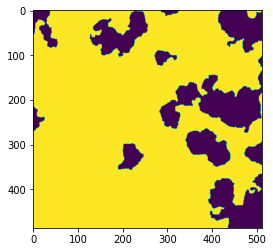

Predicted Image


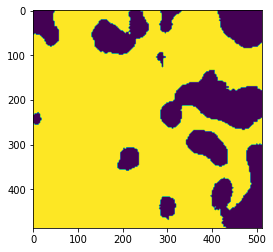

In [35]:
#keep changing i to observe different images
i=167

print("Original Image")
img = plt.imread(val_target_img_paths[i])
plt.imshow(img); plt.show()


from skimage.transform import rescale, resize, downscale_local_mean

print("Predicted Image")
image_resized = resize(np.argmax(val_preds[i], axis = -1), (487,512), anti_aliasing=True)
plt.imshow((image_resized>1.1e-19).astype(int))


# Preprocessing Test Data

In [ ]:
test_img_paths = ["test/satellite/"+i for i in os.listdir("test/satellite/")]


In [ ]:


for i in test_img_paths:
    im = PIL.Image.open(i)
    im = im.convert('RGB')
    im = np.array(im)
    
    im1 = PIL.Image.fromarray(im[0:974, 0:1024])
    im2 = PIL.Image.fromarray(im[0:974, 1024:])
    im3 = PIL.Image.fromarray(im[974:, 0:1024])
    im4 = PIL.Image.fromarray(im[974:, 1024:])
    
    im1.save("test/satellite_split/"+i[15:-4] + "_s1" + ".png")
    im2.save("test/satellite_split/"+i[15:-4] + "_s2" + ".png")
    im3.save("test/satellite_split/"+i[15:-4] + "_s3" + ".png")
    im4.save("test/satellite_split/"+i[15:-4] + "_s4" + ".png")
#     print(i)
   
   

    
    
input_img_paths = ["train/train/satellite_split/"+i for i in os.listdir("train/train/satellite_split/")]
target_img_paths = ["train/train/filtered_target_split/"+i for i in os.listdir("train/train/filtered_target_split/")]

test_img_paths = ["test/satellite_split/"+i for i in os.listdir("test/satellite_split/")]




for i in test_img_paths:
    im = PIL.Image.open(i)
    im = im.convert('RGB')
    im = np.array(im)
    
    im1 = PIL.Image.fromarray(im[0:487, 0:512])
    im2 = PIL.Image.fromarray(im[0:487, 512:])
    im3 = PIL.Image.fromarray(im[487:, 0:512])
    im4 = PIL.Image.fromarray(im[487:, 512:])
    
    im1.save("test/satellite_split16/"+i[21:-4] + "_a" + ".png")
    im2.save("test/satellite_split16/"+i[21:-4] + "_b" + ".png")
    im3.save("test/satellite_split16/"+i[21:-4] + "_c" + ".png")
    im4.save("test/satellite_split16/"+i[21:-4] + "_d" + ".png")
#     print(i)
   

In [ ]:
test_img_paths = ["test/satellite_split16/"+i for i in os.listdir("test/satellite_split16/")]

# Predicting on Test Set

In [36]:
#Predicting on test set
test_img_paths = ["test/satellite_split16/"+i for i in os.listdir("test/satellite_split16/")]

test_gen = Data_generator(20, img_size, test_img_paths, test_img_paths)
test_preds = model.predict(test_gen)
test_gen

In [48]:
#Predicted Label Contains

predicted_label = np.zeros((800, 487, 512))
for i in range(800):
# i=5

    img = plt.imread(test_img_paths[i])
    print(test_img_paths[i])


    from skimage.transform import rescale, resize, downscale_local_mean


    image_resized = resize(np.argmax(test_preds[i], axis = -1), (487,512), anti_aliasing=True)

    predicted_label[i] = (image_resized>1e-19).astype(int)


test/satellite_split16/TN_632258_12.05348273_79.18293543_18_s1_a.png
test/satellite_split16/TN_632258_12.05348273_79.18293543_18_s1_b.png
test/satellite_split16/TN_632258_12.05348273_79.18293543_18_s1_c.png
test/satellite_split16/TN_632258_12.05348273_79.18293543_18_s1_d.png
test/satellite_split16/TN_632258_12.05348273_79.18293543_18_s2_a.png
test/satellite_split16/TN_632258_12.05348273_79.18293543_18_s2_b.png
test/satellite_split16/TN_632258_12.05348273_79.18293543_18_s2_c.png
test/satellite_split16/TN_632258_12.05348273_79.18293543_18_s2_d.png
test/satellite_split16/TN_632258_12.05348273_79.18293543_18_s3_a.png
test/satellite_split16/TN_632258_12.05348273_79.18293543_18_s3_b.png
test/satellite_split16/TN_632258_12.05348273_79.18293543_18_s3_c.png
test/satellite_split16/TN_632258_12.05348273_79.18293543_18_s3_d.png
test/satellite_split16/TN_632258_12.05348273_79.18293543_18_s4_a.png
test/satellite_split16/TN_632258_12.05348273_79.18293543_18_s4_b.png
test/satellite_split16/TN_632258_1

test/satellite_split16/TN_632355_12.33389877_79.51993727_18_s4_c.png
test/satellite_split16/TN_632355_12.33389877_79.51993727_18_s4_d.png
test/satellite_split16/TN_632380_12.24016262_79.34600831_18_s1_a.png
test/satellite_split16/TN_632380_12.24016262_79.34600831_18_s1_b.png
test/satellite_split16/TN_632380_12.24016262_79.34600831_18_s1_c.png
test/satellite_split16/TN_632380_12.24016262_79.34600831_18_s1_d.png
test/satellite_split16/TN_632380_12.24016262_79.34600831_18_s2_a.png
test/satellite_split16/TN_632380_12.24016262_79.34600831_18_s2_b.png
test/satellite_split16/TN_632380_12.24016262_79.34600831_18_s2_c.png
test/satellite_split16/TN_632380_12.24016262_79.34600831_18_s2_d.png
test/satellite_split16/TN_632380_12.24016262_79.34600831_18_s3_a.png
test/satellite_split16/TN_632380_12.24016262_79.34600831_18_s3_b.png
test/satellite_split16/TN_632380_12.24016262_79.34600831_18_s3_c.png
test/satellite_split16/TN_632380_12.24016262_79.34600831_18_s3_d.png
test/satellite_split16/TN_632380_1

test/satellite_split16/TN_632423_12.21502019_79.28545155_18_s3_b.png
test/satellite_split16/TN_632423_12.21502019_79.28545155_18_s3_c.png
test/satellite_split16/TN_632423_12.21502019_79.28545155_18_s3_d.png
test/satellite_split16/TN_632423_12.21502019_79.28545155_18_s4_a.png
test/satellite_split16/TN_632423_12.21502019_79.28545155_18_s4_b.png
test/satellite_split16/TN_632423_12.21502019_79.28545155_18_s4_c.png
test/satellite_split16/TN_632423_12.21502019_79.28545155_18_s4_d.png
test/satellite_split16/TN_632429_12.20055122_79.24445654_18_s1_a.png
test/satellite_split16/TN_632429_12.20055122_79.24445654_18_s1_b.png
test/satellite_split16/TN_632429_12.20055122_79.24445654_18_s1_c.png
test/satellite_split16/TN_632429_12.20055122_79.24445654_18_s1_d.png
test/satellite_split16/TN_632429_12.20055122_79.24445654_18_s2_a.png
test/satellite_split16/TN_632429_12.20055122_79.24445654_18_s2_b.png
test/satellite_split16/TN_632429_12.20055122_79.24445654_18_s2_c.png
test/satellite_split16/TN_632429_1

test/satellite_split16/TN_632521_12.34602303_79.6124605_18_s2_b.png
test/satellite_split16/TN_632521_12.34602303_79.6124605_18_s2_c.png
test/satellite_split16/TN_632521_12.34602303_79.6124605_18_s2_d.png
test/satellite_split16/TN_632521_12.34602303_79.6124605_18_s3_a.png
test/satellite_split16/TN_632521_12.34602303_79.6124605_18_s3_b.png
test/satellite_split16/TN_632521_12.34602303_79.6124605_18_s3_c.png
test/satellite_split16/TN_632521_12.34602303_79.6124605_18_s3_d.png
test/satellite_split16/TN_632521_12.34602303_79.6124605_18_s4_a.png
test/satellite_split16/TN_632521_12.34602303_79.6124605_18_s4_b.png
test/satellite_split16/TN_632521_12.34602303_79.6124605_18_s4_c.png
test/satellite_split16/TN_632521_12.34602303_79.6124605_18_s4_d.png
test/satellite_split16/TN_632538_12.28504284_79.82316782_18_s1_a.png
test/satellite_split16/TN_632538_12.28504284_79.82316782_18_s1_b.png
test/satellite_split16/TN_632538_12.28504284_79.82316782_18_s1_c.png
test/satellite_split16/TN_632538_12.28504284_

test/satellite_split16/TN_632568_12.24606872_79.67080161_18_s1_a.png
test/satellite_split16/TN_632568_12.24606872_79.67080161_18_s1_b.png
test/satellite_split16/TN_632568_12.24606872_79.67080161_18_s1_c.png
test/satellite_split16/TN_632568_12.24606872_79.67080161_18_s1_d.png
test/satellite_split16/TN_632568_12.24606872_79.67080161_18_s2_a.png
test/satellite_split16/TN_632568_12.24606872_79.67080161_18_s2_b.png
test/satellite_split16/TN_632568_12.24606872_79.67080161_18_s2_c.png
test/satellite_split16/TN_632568_12.24606872_79.67080161_18_s2_d.png
test/satellite_split16/TN_632568_12.24606872_79.67080161_18_s3_a.png
test/satellite_split16/TN_632568_12.24606872_79.67080161_18_s3_b.png
test/satellite_split16/TN_632568_12.24606872_79.67080161_18_s3_c.png
test/satellite_split16/TN_632568_12.24606872_79.67080161_18_s3_d.png
test/satellite_split16/TN_632568_12.24606872_79.67080161_18_s4_a.png
test/satellite_split16/TN_632568_12.24606872_79.67080161_18_s4_b.png
test/satellite_split16/TN_632568_1

test/satellite_split16/TN_632639_12.18272926_79.83918662_18_s4_a.png
test/satellite_split16/TN_632639_12.18272926_79.83918662_18_s4_b.png
test/satellite_split16/TN_632639_12.18272926_79.83918662_18_s4_c.png
test/satellite_split16/TN_632639_12.18272926_79.83918662_18_s4_d.png
test/satellite_split16/TN_632642_12.16502011_79.89149328_18_s1_a.png
test/satellite_split16/TN_632642_12.16502011_79.89149328_18_s1_b.png
test/satellite_split16/TN_632642_12.16502011_79.89149328_18_s1_c.png
test/satellite_split16/TN_632642_12.16502011_79.89149328_18_s1_d.png
test/satellite_split16/TN_632642_12.16502011_79.89149328_18_s2_a.png
test/satellite_split16/TN_632642_12.16502011_79.89149328_18_s2_b.png
test/satellite_split16/TN_632642_12.16502011_79.89149328_18_s2_c.png
test/satellite_split16/TN_632642_12.16502011_79.89149328_18_s2_d.png
test/satellite_split16/TN_632642_12.16502011_79.89149328_18_s3_a.png
test/satellite_split16/TN_632642_12.16502011_79.89149328_18_s3_b.png
test/satellite_split16/TN_632642_1

test/satellite_split16/TN_632686_12.19074508_79.61829384_18_s2_d.png
test/satellite_split16/TN_632686_12.19074508_79.61829384_18_s3_a.png
test/satellite_split16/TN_632686_12.19074508_79.61829384_18_s3_b.png
test/satellite_split16/TN_632686_12.19074508_79.61829384_18_s3_c.png
test/satellite_split16/TN_632686_12.19074508_79.61829384_18_s3_d.png
test/satellite_split16/TN_632686_12.19074508_79.61829384_18_s4_a.png
test/satellite_split16/TN_632686_12.19074508_79.61829384_18_s4_b.png
test/satellite_split16/TN_632686_12.19074508_79.61829384_18_s4_c.png
test/satellite_split16/TN_632686_12.19074508_79.61829384_18_s4_d.png
test/satellite_split16/TN_632688_12.17678085_79.64865448_18_s1_a.png
test/satellite_split16/TN_632688_12.17678085_79.64865448_18_s1_b.png
test/satellite_split16/TN_632688_12.17678085_79.64865448_18_s1_c.png
test/satellite_split16/TN_632688_12.17678085_79.64865448_18_s1_d.png
test/satellite_split16/TN_632688_12.17678085_79.64865448_18_s2_a.png
test/satellite_split16/TN_632688_1

# Joining all the 16 splittted images into one and saving it to a folder

In [53]:
predicted_label_LA = np.zeros((200, 974, 1024))
for i in range(0, 797, 4):
    arr = np.zeros((974, 1024))
    arr[0:487, 0:512] = predicted_label[i]
    arr[0:487, 512:]=predicted_label[i+1]
    arr[487:, 0:512]=predicted_label[i+2]
    arr[487:, 512:]=predicted_label[i+3]
    
    predicted_label_LA[int(i/4)]=arr


In [54]:
for i in range(0, 197, 4):
    arr = np.zeros((1948, 2048))
    arr[0:974, 0:1024] = predicted_label_LA[i]
    arr[0:974, 1024:]=predicted_label_LA[i+1]
    arr[974:, 0:1024]=predicted_label_LA[i+2]
    arr[974:, 1024:]=predicted_label_LA[i+3]

#     plt.imshow(arr)

    a= PIL.Image.fromarray(arr)
    a = a.convert("L")
    a.save("test/predicted_new16_1/" + test_img_paths[4*i][23:-9] + ".png")

In [58]:
print(np.unique(plt.imread("test/predicted_new16_1/TN_632258_12.05348273_79.18293543_18.png")))
print("we get value 0 for vegetaion class and value 0.0039 for non-vegetaion class ")

[0.         0.00392157]
we get value 0 for vegetaion class and value 0.0039 for non-vegetaion class 


In [59]:
pred_img_paths = ["test/predicted_new16_1/" + i for i in os.listdir("test/predicted_new16_1/")]

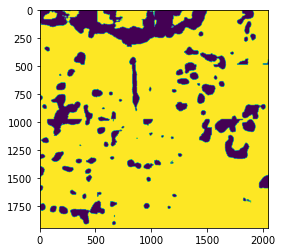

In [62]:

x = (plt.imread(pred_img_paths[5]))
plt.imshow((x>0).astype(int))

# Creating the submission File

In [67]:
prediction_dict={}

for p in range(len(pred_img_paths)):
    x = (plt.imread(pred_img_paths[p]))
    
    print(p)

    l=[]
    for j in range(x.shape[1]):
        for i in range(x.shape[0]):
            if x[i][j] > 0: 
                l.append(1)

            else: l.append(0)


    print("array_done")
    
    s=""
    c=1
    flag=0
    for i in range(len(l)):
        if l[i]==0 and flag==1: c+=1;

        if l[i]==0 and flag==0: flag = 1; s+=str(i+1)+" "

        if l[i]==1 and flag==1: s+= str(c)+ " "; flag=0; c=1
            
        if i==len(l)-1 and flag==1: s+= str(c)+ " "; flag=0; c=1

    prediction_dict[pred_img_paths[p][23:]] = s

0
array_done
1
array_done
2
array_done
3
array_done
4
array_done
5
array_done
6
array_done
7
array_done
8
array_done
9
array_done
10
array_done
11
array_done
12
array_done
13
array_done
14
array_done
15
array_done
16
array_done
17
array_done
18
array_done
19
array_done
20
array_done
21
array_done
22
array_done
23
array_done
24
array_done
25
array_done
26
array_done
27
array_done
28
array_done
29
array_done
30
array_done
31
array_done
32
array_done
33
array_done
34
array_done
35
array_done
36
array_done
37
array_done
38
array_done
39
array_done
40
array_done
41
array_done
42
array_done
43
array_done
44
array_done
45
array_done
46
array_done
47
array_done
48
array_done
49
array_done


In [68]:
prediction_dict.keys()

dict_keys(['TN_632258_12.05348273_79.18293543_18.png', 'TN_632269_12.4309812_79.29519495_18.png', 'TN_632293_12.38275675_79.35575685_18.png', 'TN_632298_12.39500866_79.42634056_18.png', 'TN_632313_12.35000383_79.25107394_18.png', 'TN_632333_12.32179005_79.41300379_18.png', 'TN_632349_12.30665809_79.41897622_18.png', 'TN_632355_12.33389877_79.51993727_18.png', 'TN_632380_12.24016262_79.34600831_18.png', 'TN_632387_12.28178754_79.47748328_18.png', 'TN_632392_12.29741881_79.50718431_18.png', 'TN_632401_12.2760296_79.49654638_18.png', 'TN_632406_12.25225177_79.47212711_18.png', 'TN_632416_12.2097144_79.36968059_18.png', 'TN_632421_12.2142415_79.30779346_18.png', 'TN_632423_12.21502019_79.28545155_18.png', 'TN_632429_12.20055122_79.24445654_18.png', 'TN_632434_12.15456739_79.24729737_18.png', 'TN_632443_12.1558455_79.3474068_18.png', 'TN_632474_12.18015508_79.43772801_18.png', 'TN_632484_12.13610747_79.42034203_18.png', 'TN_632490_12.15886594_79.4844052_18.png', 'TN_632491_12.16334297_79.49

In [69]:
df = pd.DataFrame()

df["ImageId"] = [i for i in prediction_dict.keys()]
df["EncodedPixels"] = pd.DataFrame(prediction_dict.values())
df

,ImageId,EncodedPixels
0,TN_632258_12.05348273_79.18293543_18.png,1191 195 3139 195 5087 195 7035 195 8983 195 1...
1,TN_632269_12.4309812_79.29519495_18.png,193 31 1696 34 2141 30 3645 33 4089 30 5592 34...
2,TN_632293_12.38275675_79.35575685_18.png,120 128 537 69 2068 127 2485 69 4016 128 4433 ...
3,TN_632298_12.39500866_79.42634056_18.png,363 64 564 73 847 57 1099 131 1757 49 2311 64 ...
4,TN_632313_12.35000383_79.25107394_18.png,1570 160 3517 161 5465 161 7415 159 9364 158 1...
5,TN_632333_12.32179005_79.41300379_18.png,1 116 765 48 1294 38 1398 102 1569 51 1742 37 ...
6,TN_632349_12.30665809_79.41897622_18.png,1 284 812 4 827 56 1063 97 1386 72 1462 45 159...
7,TN_632355_12.33389877_79.51993727_18.png,823 48 1063 40 2771 48 3011 40 4719 48 4959 40...
8,TN_632380_12.24016262_79.34600831_18.png,891 56 2838 57 4787 56 6736 55 8685 54 10633 5...
9,TN_632387_12.28178754_79.47748328_18.png,1116 10 1906 43 3063 12 3855 42 5012 10 5802 4...


In [70]:
ss = pd.read_csv("Sample Submission.csv")
final_string=[]

for i in range(50):
    final_string.append(prediction_dict[ss["ImageId"][i]])
    
ss["EncodedPixels"] = final_string
ss.to_csv("submission_final.csv", index=False)
ss

,ImageId,EncodedPixels
0,TN_632663_12.17698923_79.74434127_18.png,1 104 680 126 884 1168 2628 127 2832 1169 4576...
1,TN_632269_12.4309812_79.29519495_18.png,193 31 1696 34 2141 30 3645 33 4089 30 5592 34...
2,TN_632589_12.22150005_79.86395921_18.png,163 42 323 64 665 62 1152 51 1462 52 2111 42 2...
3,TN_632406_12.25225177_79.47212711_18.png,1 185 363 40 488 76 805 51 1565 19 1949 185 23...
4,TN_632592_12.17579518_79.89499740000002_18.png,90 324 504 132 643 232 1058 48 2038 325 2452 1...
5,TN_632380_12.24016262_79.34600831_18.png,891 56 2838 57 4787 56 6736 55 8685 54 10633 5...
6,TN_632557_12.32155241_79.59281668_18.png,1 12 17 4 30 35 827 54 1064 53 1462 30 1949 12...
7,TN_632258_12.05348273_79.18293543_18.png,1191 195 3139 195 5087 195 7035 195 8983 195 1...
8,TN_632434_12.15456739_79.24729737_18.png,37 10 229 101 357 82 679 55 1986 8 2177 101 23...
9,TN_632416_12.2097144_79.36968059_18.png,244911 23 246858 24 248806 25 250737 47 252684...


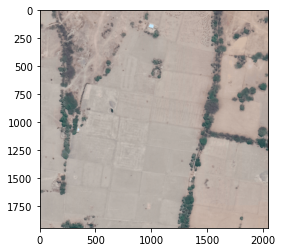

In [74]:
plt.imshow(plt.imread("test/satellite/TN_632421_12.2142415_79.30779346_18.png"))

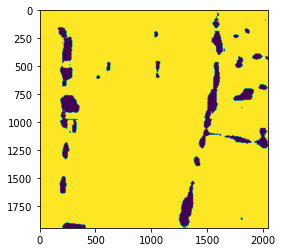

In [73]:
plt.imshow(plt.imread("test/predicted/TN_632421_12.2142415_79.30779346_18.png"))